# Assignment  Python 1

Tujuan proyek ini adalah untuk lebih mengenal visualisasi data dengan python sekonkret dan sekonsisten mungkin. Menggunakan apa yang telah Anda pelajari.Kumpulan data yang digunakan merupakan data kejahatan London yang diunduh dari dari kaggle. kumpulan data ini merupakan catatan kejahatan di wilayah metropolitan utama, seperti london, yang terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal menurut bulan, wilayah LSA, dan kategori mayor/minor dari rentang waktu Januari 2008 s/d Desember 2016.

# Install Libraries yang dibutuhkan 

In [33]:
!pip install numpy
!pip install geopy
!pip install pandas
!pip install matplotlib
!pip install folium
!pip install wordcloud

# Import Libraries yang dibutuhkan

In [34]:
#Untuk memproses data
import pandas as pd
import numpy as np

#Untuk mencari lattitude dan longitude dari setiap wilayah
from geopy.geocoders import Nominatim

#Untuk membuat peta
import folium
from folium import plugins

#Untuk keperluan plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#Untuk membuat wordcloud
from wordcloud import WordCloud

# Dataset

Dataset yang digunakan merupakan data kejahatan pada wilayah mtropolitan utama kota london, yang mencakup wilayah LSOA, mayoritas dan minoritas kejahatan yang dilakukan dari rentang waktu Januari 2008 s/d Desember 2016

Adapun beberapa daftar kolom pada dataset ini yaitu:
1. losa_code = kode area polisi
2. borough = wilayah kota london yang terkait dengan data statistik
3. major_category = kategori kejahatan berat
4. minor_category = kategori kejahatan ringan
5. value = jumlah kejahatan yang terjadi di wilayah tertentu pada bulan tertentu
6. year = ringkasan tahun kejadian
7. month = ringkasan bulan kejadian

In [35]:
#deteksi berbagai format non standard missing values
missing_values = ['n/a', 'na', "--", "?", "NA"]
#membaca dataset
df = pd.read_csv('E:/dataset/london_crime_by_lsoa.csv')

# Preprocessing Dataset sebelum visualisasi

Terdapat beberapa hal yang dilakukan dalam proses preprocessing ini yaitu:
1. mangubah nama tiap kolom ke dalam Bahasa Indonesia seuai dengan deskripis agar mempermudah proses pembuatan kode program.
2. Mengethaui dimensi dari dataset
3. Mengetahui kolom apa saja yang ada pada dataset
5. Mengetahui apakah tipe data dari setiap kolom sudah sesuai atau belum
5. Mengetahui missing values
6. Mengatasi missing values yang ada dengan mengisinya dengan nilai median dari kolom yang membuat missing values

# Mengubah nama kolom

In [36]:
df = df.rename(
    columns={
        'lsoa_code': 'Kode Area',
        'borough': 'Wilayah',
        'major_category': 'Kejahatan Berat',
        'minor_category': 'Kejahatan Ringan',
        'value': 'Jumlah Kasus',
        'year': 'Tahun',
        'month': 'Bulan'
    },
)

# Mengetahui dimensi dari dataset

In [37]:
baris, kolom = df.shape
print("Dimensi Data")
print(baris, " baris")
print(kolom, " kolom")

Dimensi Data
13490604  baris
7  kolom


# Mengetahui kolom apa saja yang ada pada dataset

In [38]:
# Menampilkan sample 25 data pertama
df.head(25)

,Kode Area,Wilayah,Kejahatan Berat,Kejahatan Ringan,Jumlah Kasus,Tahun,Bulan
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [39]:
# Menampilkan daftar kolom yang ada dari dataset
columns = df.columns
print(columns)

Index(['Kode Area', 'Wilayah', 'Kejahatan Berat', 'Kejahatan Ringan',
       'Jumlah Kasus', 'Tahun', 'Bulan'],
      dtype='object')


Terdapat kolom Kode area, Wilayah, Kejahatan berat, Kejahatan ringan, Jumlah Kasus, Tahun, dan Bulan yang terdeteksi pada dataset

# Menyiapkan Variabel global 

In [40]:
# menyiapkan list 'Tahun' untuk keperluan berikutnya
years = list(map(int,np.sort(df['Tahun'].unique())))

# menyiapkan list 'Wilayah' untuk keperluan berikutnya
boroughs = list(df['Wilayah'].unique())

# menyiapkan list 'Kejahatan Berat' untuk keperluan berikutnya
major_categories = list(df['Kejahatan Berat'].unique())

# Menyiapkan color_list untuk kebutuhan visualisasi grafik
colors_list = ['darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna']

# Menyiapkan range list untuk months
months = list(range(1,13))

# Mengetahui Missing Values yang terdapat pada data

# Mengecek standard missing values dan unstandard missing values pada setiap kolom

In [41]:
for col in columns:
    print('Jumlah Standard Missing Values Pada Kolom {} adalah {}'.format(
        col, df[col].isnull().sum()))

Jumlah Standard Missing Values Pada Kolom Kode Area adalah 0
Jumlah Standard Missing Values Pada Kolom Wilayah adalah 0
Jumlah Standard Missing Values Pada Kolom Kejahatan Berat adalah 0
Jumlah Standard Missing Values Pada Kolom Kejahatan Ringan adalah 0
Jumlah Standard Missing Values Pada Kolom Jumlah Kasus adalah 0
Jumlah Standard Missing Values Pada Kolom Tahun adalah 0
Jumlah Standard Missing Values Pada Kolom Bulan adalah 0


Tidak ada standard missing values maupun unstandard missing values pada dataset

# Mengecek tipe data sudah sesuai atau belum (Unexpected Missing Values)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Kode Area         object
 1   Wilayah           object
 2   Kejahatan Berat   object
 3   Kejahatan Ringan  object
 4   Jumlah Kasus      int64 
 5   Tahun             int64 
 6   Bulan             int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Dari hasil tersebut terdapat mayoritas dua tipe data yang digunakan yaitu tipe data string(pada kolom kode area, wilayah, kejahatan berat, kejahatan ringan) dan tipe data integer (pada kolom jumlah kasus, tahun, dan bulan)

In [43]:
# Mengetahui nilai unique setiap kolom untuk menentukan data dengan tipe anomali
string_columns = ['Kode Area', 'Wilayah', 'Kejahatan Berat', 'Kejahatan Ringan']
integer_columns = ['Jumlah Kasus', 'Tahun', 'Bulan']

for string_col in string_columns:
    print('Nilai Unik Untuk Kolom ', string_col)
    print("[", end='')
    for unique_val in df[string_col].unique():
        print(unique_val, end=', ')
    print("]")

Nilai Unik Untuk Kolom  Kode Area


[E01001116, E01001646, E01000677, E01003774, E01004563, E01001320, E01001342, E01002633, E01003496, E01004177, E01001985, E01003076, E01003852, E01004547, E01002398, E01002358, E01000086, E01003708, E01002945, E01004195, E01003651, E01004660, E01001786, E01001432, E01001301, E01001794, E01002195, E01001201, E01001972, E01003325, E01001317, E01002634, E01000733, E01032741, E01002533, E01000503, E01002006, E01002595, E01003067, E01003947, E01002360, E01003583, E01001029, E01001193, E01000280, E01004436, E01004678, E01003064, E01003238, E01000713, E01001206, E01000606, E01002022, E01000869, E01000455, E01001171, E01003211, E01033083, E01000893, E01002858, E01002678, E01003191, E01002977, E01000510, E01003989, E01002122, E01000808, E01003019, E01004346, E01002772, E01004048, E01003547, E01000172, E01000586, E01032513, E01001600, E01003744, E01001787, E01002013, E01004165, E01003738, E01001738, E01004254, E01000996, E01001863, E01002804, E01003483, E01002193, E01000507, E01000723, E01001807

E01001119, E01000214, E01003150, E01001426, E01003644, E01000074, E01002801, E01001706, E01001052, E01002393, E01000049, E01004280, E01004122, E01033099, E01000794, E01003781, E01004507, E01003638, E01000411, E01003107, E01004126, E01003091, E01000232, E01000429, E01004237, E01004264, E01003742, E01001385, E01000175, E01000828, E01002079, E01004162, E01000320, E01004649, E01003640, E01033572, E01000504, E01002149, E01003430, E01003470, E01003383, E01000533, E01003529, E01000958, E01000710, E01003378, E01000424, E01004734, E01003746, E01000266, E01003322, E01000712, E01002128, E01003990, E01000922, E01000422, E01001205, E01003440, E01000637, E01002087, E01001642, E01003041, E01002244, E01003431, E01002715, E01000150, E01004487, E01001202, E01001633, E01003871, E01002679, E01004014, E01000744, E01003751, E01001636, E01001767, E01002913, E01000447, E01002436, E01003097, E01002164, E01004501, E01001521, E01002264, E01004762, E01004338, E01004040, E01000550, E01002748, E01001687, E01003276,

In [44]:
for int_col in integer_columns:
    print('Nilai Unik Untuk Kolom', int_col)
    print(df[int_col].unique())
    print("="*30)

Nilai Unik Untuk Kolom Jumlah Kasus
[  0   1   2   3   4   9   5   6   7  10  18  11  16   8  72  12  53  14
  19  15  17  20  43  50  37  57  21  13  80  25  28  22  58  33  29  38
  88  23 111  40  39  60  26  48  32  66 122  47  30 118  75  54  51  67
  45  35  24 117  27  68  99  65  84  34  55  81 112 119  71 113  36  61
  46  31  59  44 149  49 241 104  69  77  41  64  42 167  73  74 165 107
  86  52  63  79 103 106  70  90  91 148 130  62 136  98  92 141  78  82
  56 194 168 152 204 114 153 116 157 131 120  96 101  97  95 309 142  87
 146 195  93 166 144  94 161 135 170  76 127 210  83 150 186 156 124  85
 174 221 163 109 110  89 115 138 140 121 139 105 129 177 237 235 226 199
 240 189 280 100 102 288 134 244 211 158 187 137 123 164 108 224 201 233
 132 220 126 154 133 257 178 214 147 229 176 202 230 155 162 160 203 248
 215 172 192 208 232 197 173 216 205 180 151 184 179 243 188 228 159 254
 267 247 196 181 193 260 169 281 212 183 128 217 143 239 200 249 125 253
 145 185 190 28

Dari hasil tersebut tidak ditemukan adanya anomali karena nilai setiap kolom bertipe string dan setiap kolom bertipe integer sudah diisi dengan nilai yang seharusnya sehingga dapat disimpulkan bahwa tidak terdapat unexpected missing values

# Meringkas keseluruhan missing values

In [45]:
print("Total keseluruhan missing values = ",
      df.isnull().sum().sum())

Total keseluruhan missing values =  0


Karena tidak ada missing value sehingga proses imputasi (pengisian data yang hilang) tidak perlu dilakukan

# Membuat DataFrame baru

# DataFrame untuk melihat Total kasus kejahatan mayor tiap Tahun

In [46]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Kejahatan Mayor', summing 'Jumlah Kasus'
    majorcat_per_tahun = df[
        df['Tahun'] == year
    ].groupby('Kejahatan Berat')['Jumlah Kasus'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, majorcat_per_tahun.reset_index()['Jumlah Kasus'].values),
        index=majorcat_per_tahun.index
    )

# Membuat dataframe dengan 'Kejahatan Berat' sebagai index dan years sebagai columns
df_crime_majorcat_years = pd.DataFrame(
    columns=years,
    index=major_categories,
    data=data
)
df_crime_majorcat_years['Total'] = df_crime_majorcat_years[years].sum(axis=1)

# urutkan data berdasarkan Total dari tertinggi ke terendah
df_crime_majorcat_years.sort_values(by='Total', ascending=False, inplace=True)

In [47]:
# tampilkan 10 data teratas
df_crime_majorcat_years.head(10)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273


# DataFrame untuk melihat total kasus kejahatan untuk setiap wilayah tiap tahun

In [48]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Wilayah', summing 'Jumlah Kasus'
    wilayah_per_tahun = df[
        df['Tahun'] == year
    ].groupby('Wilayah')['Jumlah Kasus'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, wilayah_per_tahun.reset_index()['Jumlah Kasus'].values),
        index=wilayah_per_tahun.index
    )

# Membuat dataframe dengan 'Wilayah' sebagai index dan years sebagai columns
df_crime_boroughs_years = pd.DataFrame(
    columns=years,
    index=boroughs,
    data=data
)
df_crime_boroughs_years['Total'] = df_crime_boroughs_years[years].sum(axis=1)

# urutkan data berdasarkan 'Total' dari tertinggi ke terendah
df_crime_boroughs_years.sort_values(by='Total', ascending=False, inplace=True)

In [49]:
# Menampilkan 10 data teratas dari df_crime_boroughs_years
df_crime_boroughs_years.head(10)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562
Islington,26273,25485,24693,24980,26268,23784,24679,27032,27092,230286
Tower Hamlets,23578,21959,23072,24712,26784,26258,25504,27493,29253,228613
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551


# DataFrame untuk melihat total kasus kejahatan bulanan setiap tahunnya

In [50]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Bulan', summing 'Jumlah Kasus'
    crime_year_month = df[
        (df['Tahun'] == year)
    ].groupby('Bulan')['Jumlah Kasus'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, crime_year_month.reset_index()['Jumlah Kasus'].values),
        index=crime_year_month.index
    )

# Membuat dataframe dengan 'Month' sebagai index dan years sebagai columns
df_crime_year_month = pd.DataFrame(
    columns=years,
    index=range(1,13,1),
    data=data
)
df_crime_year_month['Total'] = df_crime_year_month[years].sum(axis=1)

# rename index dengan nama bulan dan bukan angka
months_name = ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dict_index = {}
for i in range(1,13,1):
    dict_index[i] = months_name[i-1]
df_crime_year_month.rename(index=dict_index,inplace=True)

In [51]:
# Menampilkan 10 data teratas dari df_crime_year_month
df_crime_year_month.head(10)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Jan,65419,59142,54934,57966,62436,58933,55515,57055,58847,530247
Feb,62626,54706,55069,54895,56735,55271,51222,53316,56697,500537
March,61343,63482,63629,61282,67537,57590,57669,60096,59167,551795
Apr,59640,59181,60085,58714,58801,55678,53467,56445,58637,520648
May,62587,62897,62126,62630,64344,56765,56327,61038,63990,552704
Jun,62290,63116,62632,61822,62281,56839,57039,60760,62262,549041
Jul,64126,63281,63764,62428,63280,60508,58564,61606,65519,563076
Aug,59959,58695,59040,59117,62143,57467,55641,58056,62666,532784
Sep,58414,57847,59731,58640,56912,54924,56933,57564,61412,522377
Oct,63354,61176,62113,63622,61728,59956,60537,62361,63405,558252


# Visualisasi Data

# Line Chart

Tren total kasus kejahatan setiap bulan yang terjadi selama rentang tahun 2008 s/d. 2016

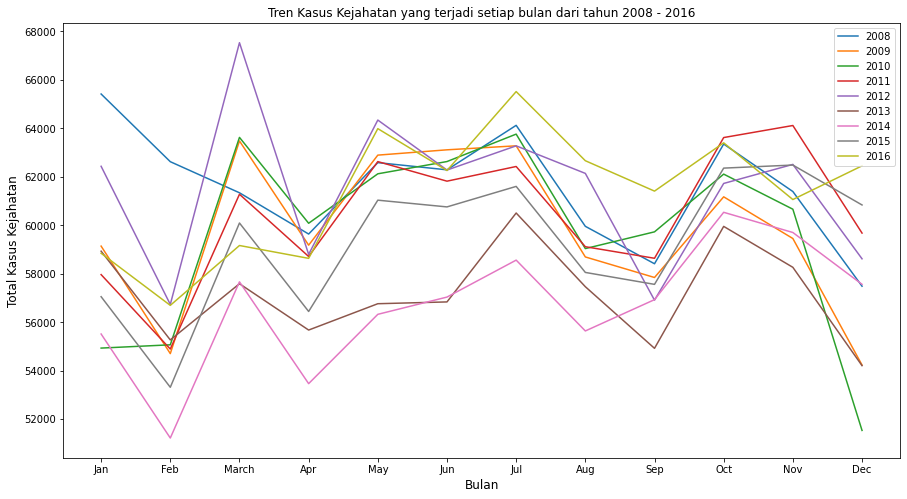

In [52]:
ax = df_crime_year_month[years].plot(figsize=(15,8))
ax.set_xticks(range(0,12))
ax.set_xticklabels(months_name)
ax.legend(loc='upper right')
ax.set_ylabel('Total Kasus Kejahatan', fontsize=12)
ax.set_xlabel('Bulan', fontsize=12)
ax.set_title('Tren Kasus Kejahatan yang terjadi setiap bulan dari tahun 2008 - 2016', fontsize=12)
plt.show()

Berdasarkan diagram garis diatas, dapat kita liat pada setiap tahunnya terdapat oenurunan tingkat kejahatn dari bulan Januari - Februari, namun terjadi kenaikan kejahatan yang relatif tinggi pada bulan Februari - Maret dan mengalami penurunan kembali pada bulan Maret - April. Bulan selanjutnya pun kurang lebih sama dimana ploa tren yang terjadi tidak menentu namun terdapat penurunan tren kejahatan pada bulan september dan juga bulan desember.


# Bar Chart

5 wilayah yang total kasus kejahatan tertinggi dan 5 wilayah yang total kejahatnnya rendah.

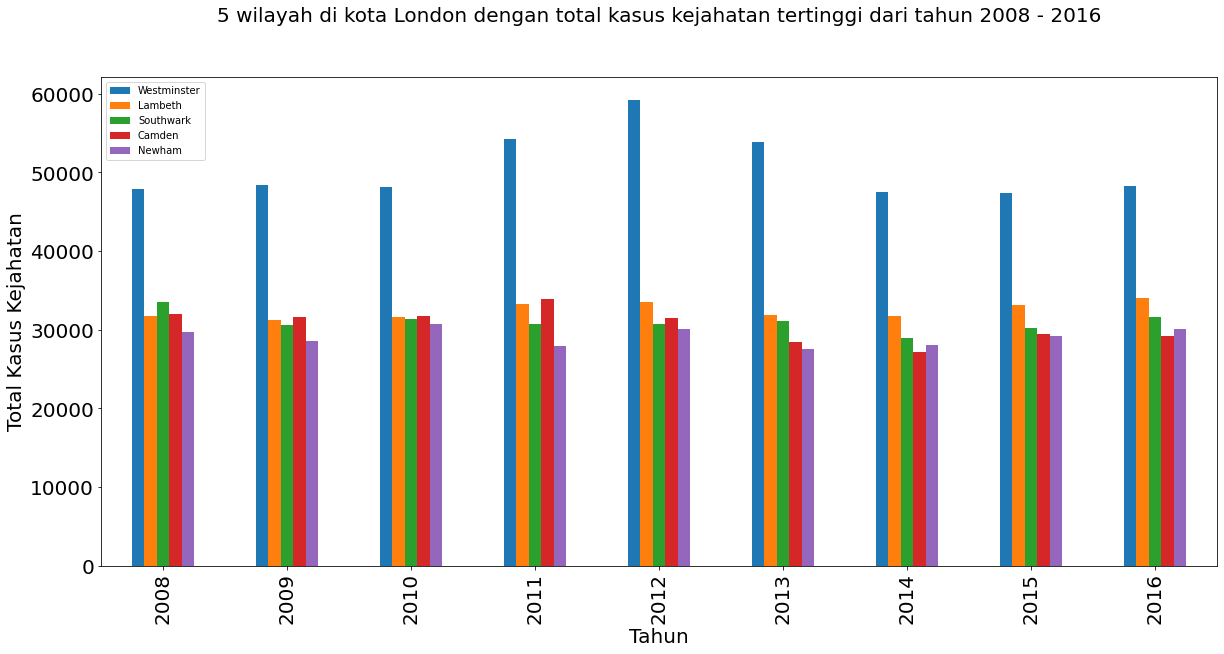

In [53]:
df_crime_boroughs_years[years].head().transpose().plot(figsize=(20, 9), kind='bar')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('5 wilayah di kota London dengan total kasus kejahatan tertinggi dari tahun 2008 - 2016', fontsize=20, y=1.1)
plt.show()

Dari diagram batang diatas dapat kita simpulkan bahwa wilayah dengan tingkat kejahatan tertinggi dari tahun 2008 - 2016 yaitu wilayah Westminster, Lambeth, Sothwark, Camden, dan Newham. Dari diagram batang tersebut juga dapat kita simpulkan bahwa wilayah Westminster merupakan wilayah yang paling tidak aman di kota London dikarenakan tingkat kejahatan yang paling tinggi.

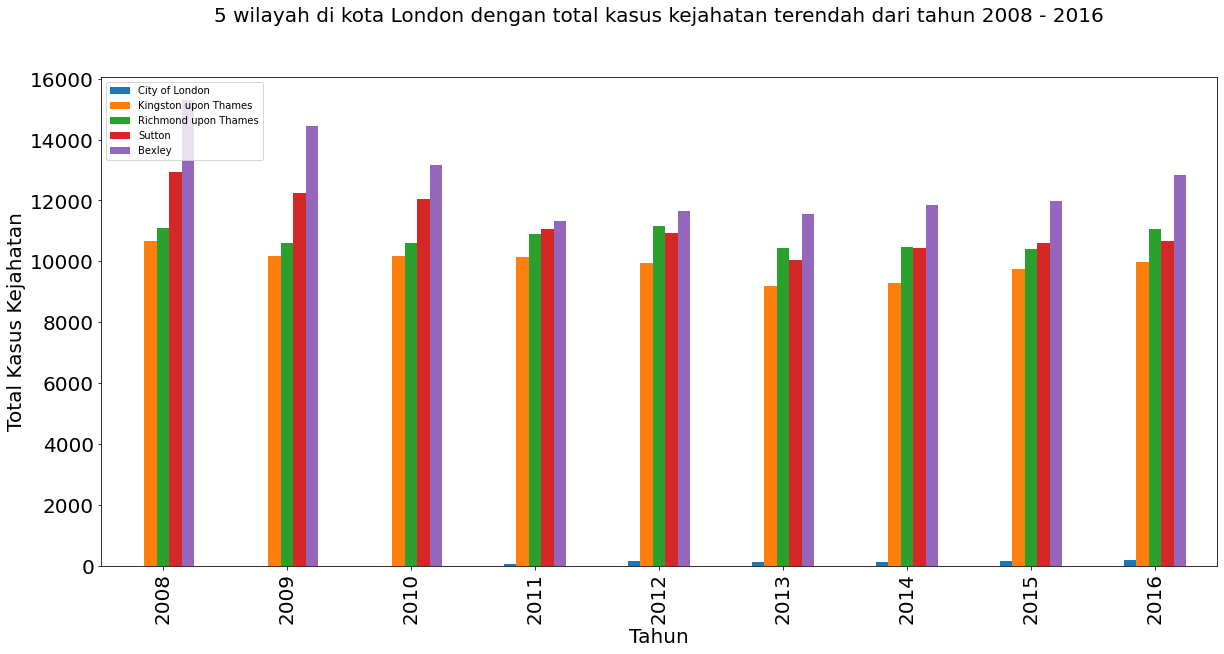

In [54]:
df_crime_boroughs_years.sort_values(by='Total')[years].head().transpose().plot(figsize=(20, 9), kind='bar')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('5 wilayah di kota London dengan total kasus kejahatan terendah dari tahun 2008 - 2016', fontsize=20, y=1.1)
plt.show()

Dari diagram batang diatas dapat kita simpulkan bahwa wilayah dengan tingkat kejahatan terendah dari tahun 2008 - 2016 yaitu wilayah City of London, Kingston upon Thames, Richmond upon Thames, Sutton, dan Bexley. Dari diagram batang tersebut juga dapat kita simpulkan bahwa wilayah City of London merupakan wilayah yang paling aman di kota London dikarenakan tingkat kejahatan yang paling rendah.

# Area Chart

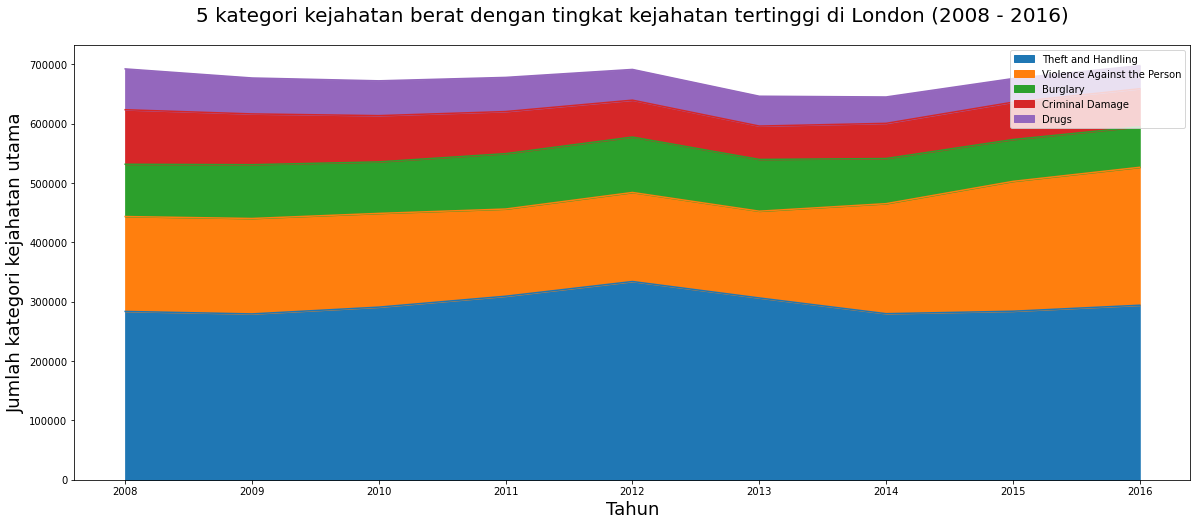

In [55]:
# buat dataframe baru dengan mengambil 5 data teratas yang total kasus kejahatannya tertinggi lalu transpose
df_area = df_crime_majorcat_years[:5][years].transpose()
df_area.plot(
    kind='area',
    stacked=True,
    figsize=(20,8)
)
plt.title('5 kategori kejahatan berat dengan tingkat kejahatan tertinggi di London (2008 - 2016)', fontsize=20, y=1.04)
plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Jumlah kategori kejahatan utama', fontsize=18)
plt.legend(loc='upper right', fontsize=10)
plt.show()

Grafik di atas menunjukkan 5 kategori kejahatan berat dangan total kasus kejahatan tertinggi di kota London dari tahun 2008 s/d. 2016.
1. Dari kelima kejahatan berat tersebut, Theft dan Handling merupakan total kasus kejahatan berat yang paling sering terjadi di kotta London yang ditandari dengan area yang paling luas (biru)
2. Dari grafik diatas dapat kita simpulkan bahwa tren kejahatan berat mengalami peningkatan pada tahun 2012 dan 2016.
3. Kategori Violence against the person mengalami peningkatan mulai tahun 2014.
4. Diantara kelima kategori kejahatan berat tertinggi, kategori Drugs dan Criminal damages yang paling sedikit total kejahatannya.

# Histogram

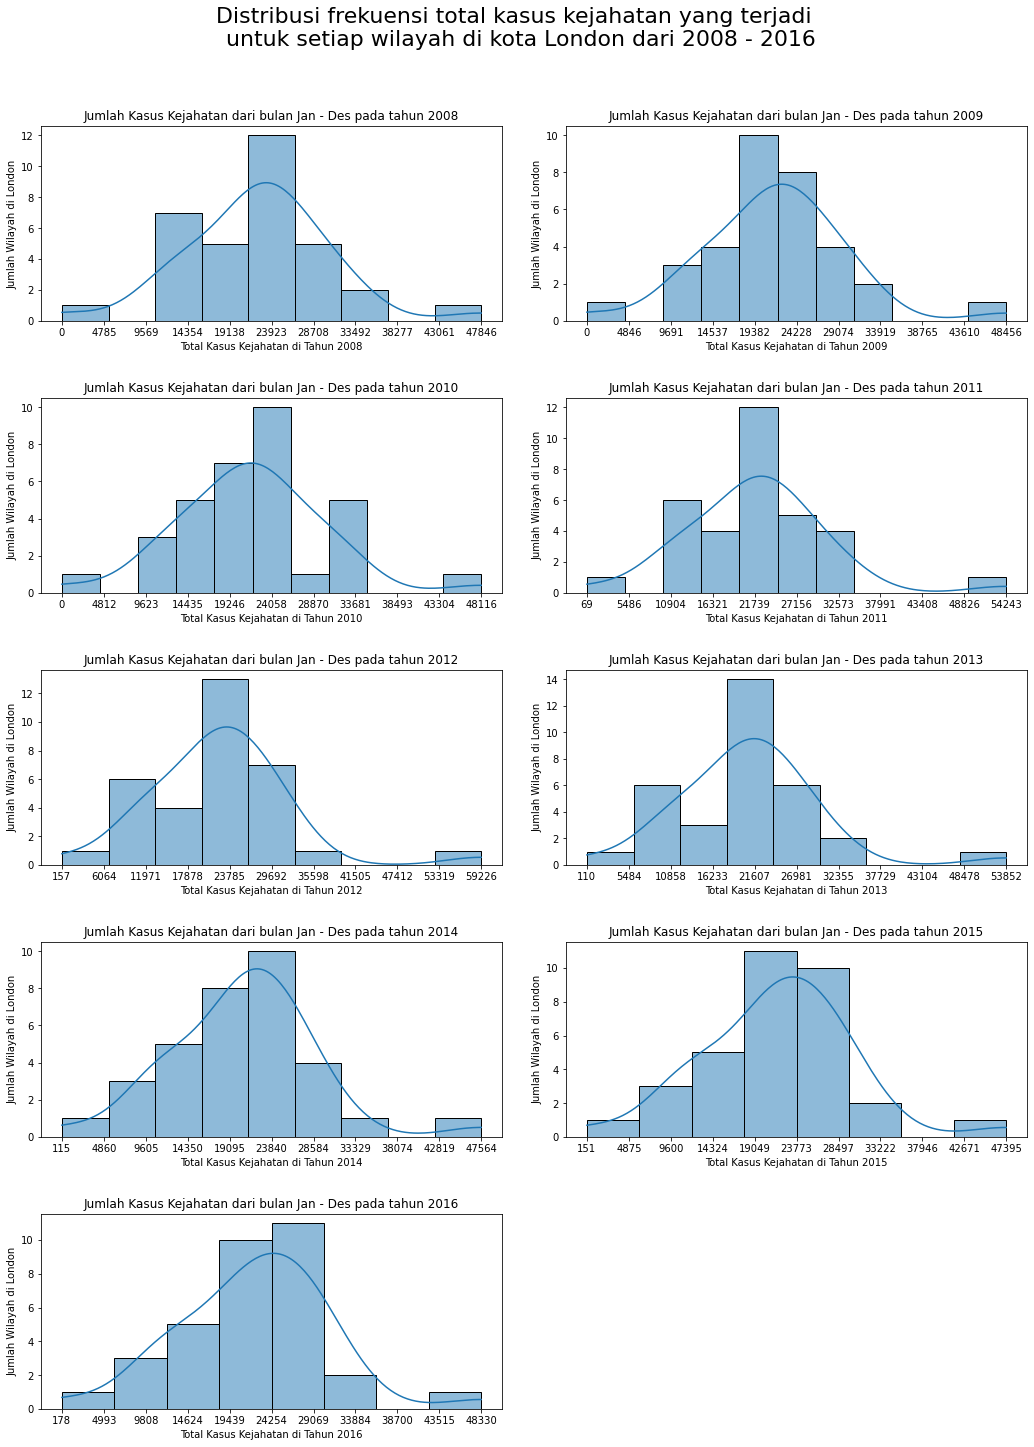

In [56]:
n_rows = int(len(years))
n_cols = 2

fig = plt.figure(figsize=(15, 35)) # membuat figure untuk menampung subplot
ax_s = [] #menampung ax untuk setiap subplot

plot_number = 1 #inisialisasi plot number dari 1

for tahun in years:
    # hitung bin_edges dari setiap kategori 
    count, bin_edges = np.histogram(df_crime_boroughs_years[years][tahun])
    
    # subplot histogram
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    sns.histplot(df_crime_boroughs_years[years][tahun],kde=True, ax=ax_s[plot_number-1])
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Des pada tahun '+str(tahun))
    ax_s[plot_number-1].set(xlabel = "Total Kasus Kejahatan di Tahun "+str(tahun), ylabel = "Jumlah Wilayah di London")
    
    # mengatur nilai pada sumbu x dengan masing-masing bin_edges
    ax_s[plot_number-1].set_xticks(bin_edges)
    
    #increment plot_number setiap looping years
    plot_number += 1

fig.suptitle("Distribusi frekuensi total kasus kejahatan yang terjadi \n untuk setiap wilayah di kota London dari 2008 - 2016", y=1, fontsize=22)
fig.tight_layout(pad=3.0)  # giving padding between plot in subplot
plt.show()

1. Berdasarkan histogram, mayoritas berbentuk Bell-Curved sehingga dapat disimpulkan bahwa sebagian besar data berdistribusi normal.
2. Semua grafik tidak terdapat modus ganda
3. Nilai ekstrim untuk total kasus kejahatan yang terjadi ditemukan dari tahun 2008 - 2016. Nilai ekstrim ini bisa dengan lebih detail diketahui dengan menggunakan visualisasi seperti Boxplot. Contoh nilai ekstrim yang ada pada histogram ini, seperti ada wilayah dengan total kasus kejahatan yang relatif sangat kecil dari biasanya yaitu pada kisaran 0 - 4.785 kejadian dan ada wilayah dengan total kasus kejahatan yang relatif sangat besar dari biasanya yaitu pada kisaran 43.061 - 47.46 kejadian pada tahun 2008

# Box Plot

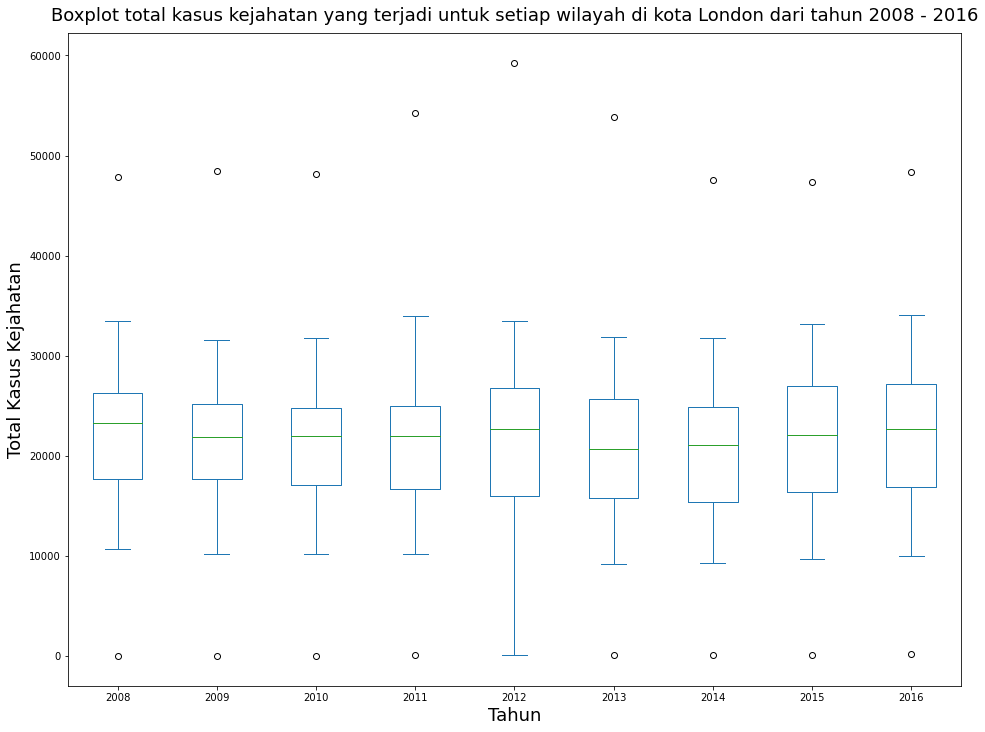

In [57]:
df_crime_boroughs_years[years].plot(
    kind='box',
    figsize=(16,12),
)
plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Total Kasus Kejahatan', fontsize=18)
plt.title('Boxplot total kasus kejahatan yang terjadi untuk setiap wilayah di kota London dari tahun 2008 - 2016',  fontsize=18, y=1.01)
plt.show()

1. Grafik di atas mempertegas dan memperjelas visualisasi histogram yang sudah dibuat sebelumnya, dimana pada setiap tahunnya rata-rata total kasus kejahatan yang terjadi untuk setiap wilayah berada dalam kisaran sekitar 23.000an - 26.000an kejadian.
2. Range total kasus kejahatan yang terjadi setiap tahunnya memiliki range yang mirip, kecuali 2012. Range total kasus kejahatan pada tahun 2012 lebih tersebar dibandingkan tahun-tahun lainnya.
3. Melalui boxplot ini juga akan mengonfirmasi adanya total kasus kejahatan dengan nilai yang ekstrim. Nilai esktrim ini ditemukan dari rentang tahun 2008 - 2016. Wilayah City of London menjadi wilayah yang relatif tentram dengan total kasus kejahatan setiap tahunnya berada kurang dari (Q1 - 1.5x(Q3-Q1)), sehingga pada boxplot muncul sebagai outliers (ditandai dengan simbol lingkaran). Wilayah Westminster menjadi wilayah yang kriminalitasnya relatif tinggi dengan total kasus kejahatan setiap tahunnya berada lebih dari (Q3 + 1.5x(Q3-Q1)), sehingga pada boxplot muncul sebagai outliers

# Pie Chart

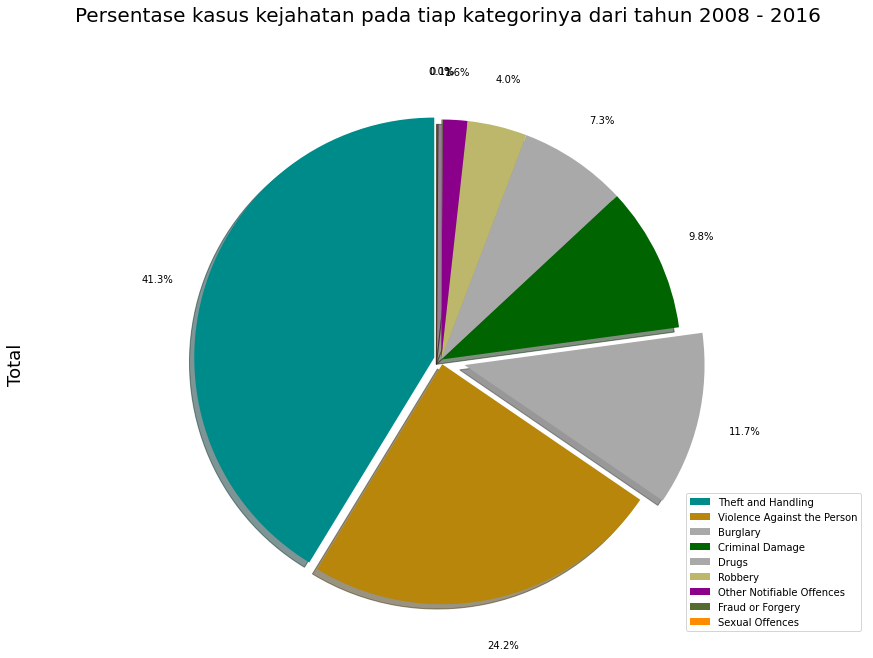

In [58]:
# ratio for each category crime with which to offset each wedge.
explode_list = [0.03, 0.02, 0.1, 0, 0, 0, 0, 0, 0]
df_pie = df_crime_majorcat_years['Total']
df_pie.plot(kind='pie',
            figsize=(15, 10),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,         # turn off labels on pie chart
            pctdistance=1.2,# the ratio between the center of each pie slice and the start of the text generated by autopct
            colors=colors_list,  # add custom colors
            explode=explode_list  # 'explode' top 3 major_category
            )

# scale the title up by 12% to match pctdistance
plt.title('Persentase kasus kejahatan pada tiap kategorinya dari tahun 2008 - 2016', y=1.12, fontsize=20)
plt.ylabel('Total',fontsize=18)
plt.axis('equal')

# add legend
plt.legend(labels=df_pie.index.values, loc='lower right', bbox_to_anchor=(1, 0))

plt.show()

1. Berdasarkan diagram diatas terdapat 3 kejahatan yang memiliki total kejahatan terbanyak yaitu theft ad handling sebesar 41,3%, Violence against the person sebesar 24,2%, dan Burglary sebesar 11,7%.
2. Kejahatan tersebut menyumbang 77,2% dari total keseluruhan kejahatan yang terjadi dari tahun 2008 sampai dengantahun 2016 di kota London.


# Scatter Plot

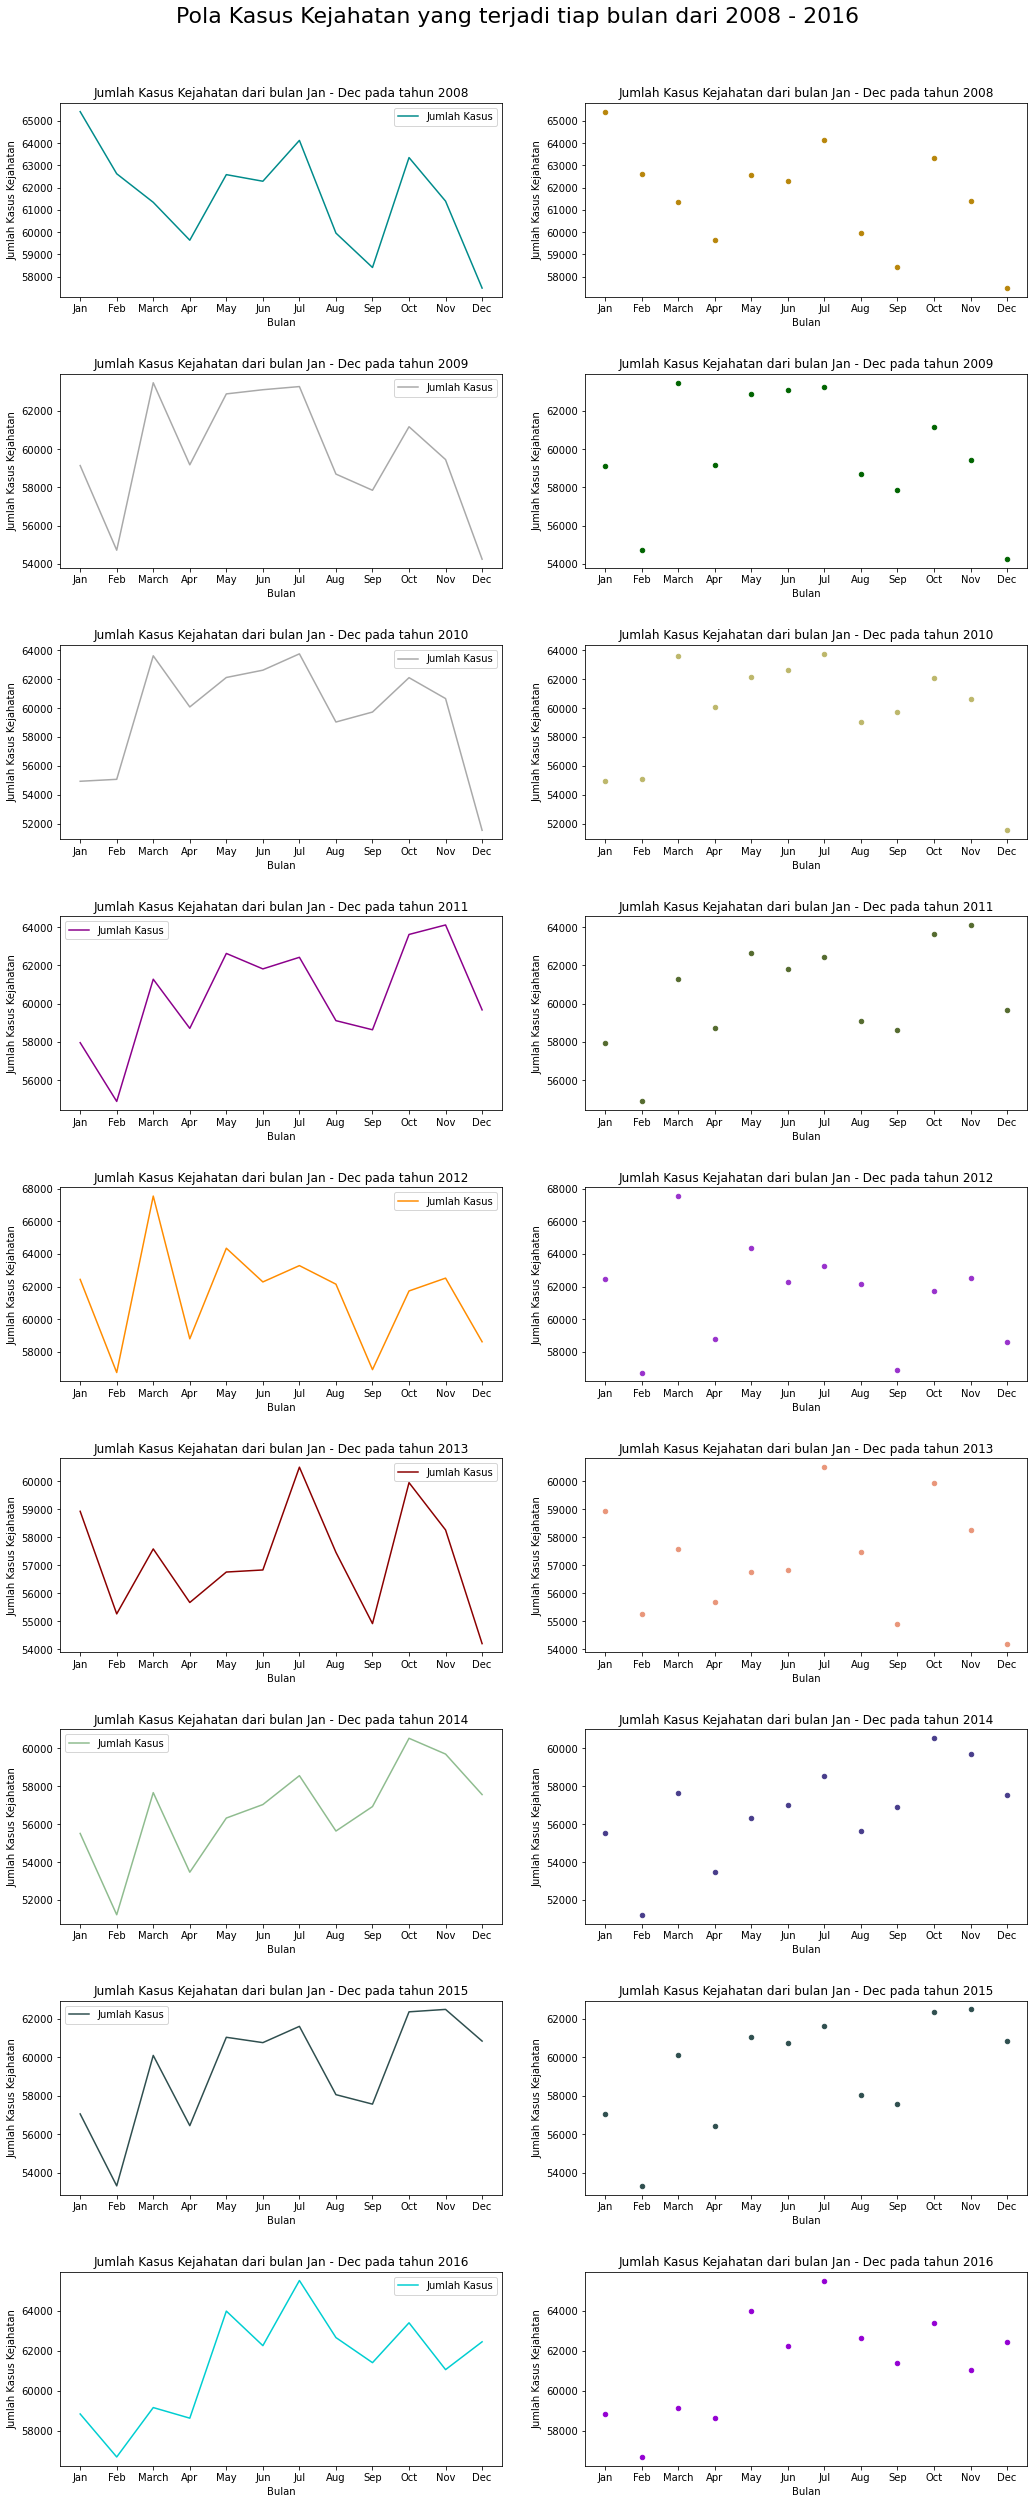

In [59]:
n_rows = int(len(years))
n_cols = 2

fig = plt.figure(figsize=(15, 35)) # membuat figure untuk menampung subplot
ax_s = [] #menampung ax untuk setiap subplot

plot_number = 1 #inisialisasi plot_number subplot dari 1

for tahun in years:
    #subplot line plot
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    
    #ambil data pada tahun tertentu, group berdasarkan bulan lalu sum 'Jumlah Kasus'-nya
    df_data = df[
        (df['Tahun'] == tahun)
    ][['Bulan', 'Jumlah Kasus']].groupby('Bulan').sum()
    
    #plotting
    df_data.plot(
        kind='line',
        ax=ax_s[plot_number-1],
        color=colors_list[plot_number-1]
    )
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set_xlabel('Bulan')
    ax_s[plot_number-1].set_ylabel('Jumlah Kasus Kejahatan')
    ax_s[plot_number-1].set_xticks(months)
    ax_s[plot_number-1].set_xticklabels(months_name)
    plot_number += 1
    
    # subplot scatter plot
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    df_data.reset_index(inplace=True)
    df_data.columns = ['Bulan', 'Jumlah Kasus']
    df_data.plot(
        kind='scatter',
        x='Bulan',
        y='Jumlah Kasus',
        ax=ax_s[plot_number-1],
        color=colors_list[plot_number-1]
    )
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set_xlabel('Bulan')
    ax_s[plot_number-1].set_ylabel('Jumlah Kasus Kejahatan')
    # mengubah index dan labels pada sumbu x agar diganti menjadi nama bulan
    ax_s[plot_number-1].set_xticks(months)
    ax_s[plot_number-1].set_xticklabels(months_name)
    
    #increment plot_number in each itteration
    plot_number += 1

fig.suptitle("Pola Kasus Kejahatan yang terjadi tiap bulan dari 2008 - 2016", y=1, fontsize=22)
fig.tight_layout(pad=3.0)  # giving padding between plot in subplot
plt.show()

1. Dari tahun 2008 - 2016, mayoritas kasus kejahatan terjadi penurunan dari bulan Januari - Februari dan terjadi peningkatan dari bulan Februari - Maret. Peningkatannya juga terbilang relatif tinggi dalam rentang tahun 2009 - 2012, 2014 yang rata-rata peningkatannya lebih dari 5000an kasus hanya dalam sebulan.
2. Dalam rentang 1 bulan dari Maret - April, terjadi penurunan pada kasus kejahatan. Penurunannya terbilang relatif tinggi dalam rentang tahun tersebut mulai dari 4000an sampai 8000an penurunan kasus.
3. Dalam rentang April - Oktober kasus kejahatan mengalami fluktuasi kadang naik dan kadang turun.
4. Dalam interval Oktober - Desember kasus kejahatan kembali mengalami penurunan hampir mayoritas di setiap tahun dari tahun 2008 - 2016

# Word Cloud

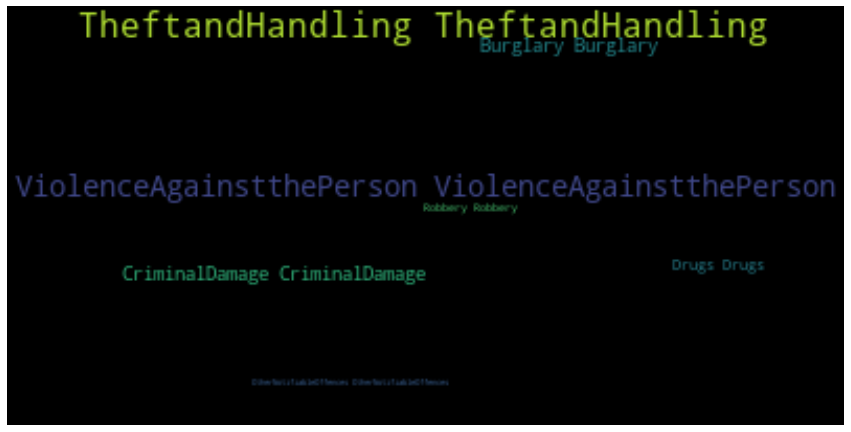

In [61]:
#buat dataframe baru yang mengambil data yang tahunnya 2016, lalu dipilih hanya kolom 'Kejahatan ' dan 'Jumlah Kasus'
df_word_cloud = df[
    df['Tahun']==2016
][['Kejahatan Berat','Jumlah Kasus']]

# Menghapus spasi yang terdapat pada Kejahatan Mayor
df_word_cloud['Kejahatan Berat'] = df_word_cloud['Kejahatan Berat'].apply(lambda x: ''.join(x.split()))

# menjumlahkan total kasus kejahatan berdasarkan "Kejahatan Mayor"
df_word_cloud = df_word_cloud.groupby('Kejahatan Berat').sum()
df_word_cloud.index.name = None

# hitung sum dari 'Jumlah Kasus'
total_keseluruhan_kasus = df_word_cloud['Jumlah Kasus'].sum()

# mengatur kata maksimum untuk proporsi dalam word cloud
max_words = 250

#inisialisasi string kosong untuk menampung cloning 'Kejahatan Mayor' sebanyak persentasenya
word_string = ''

#lakukan perulangan untuk setiap 'Kejahatan Mayor' yang ada
for crime_cat in df_word_cloud.index.values:
    # lakukan copy string 'Kejahatan Mayor' sebesar proporsinya terhadap keseluruhan kasus
    repeat_num_crime_cat = int(
        df_word_cloud.loc[crime_cat, 'Jumlah Kasus']/float(total_keseluruhan_kasus)*max_words)
    # concat ke word_string sejumlah repeat_num_crime_cat
    word_string = word_string + ((crime_cat + ' ') * repeat_num_crime_cat)

# Instansiasi objek WordCloud dengan warna background hitam
crime_category_word_cloud = WordCloud(
    background_color='black'
)
#generate word_string ke dalam objek Word CLoud
crime_category_word_cloud.generate(word_string)

fig = plt.figure() #buat figure
fig.set_figwidth(15) #setting lebar figure
fig.set_figheight(18) #setting tinggi figure

# Display the word cloud
plt.imshow(crime_category_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Folium Map of London

In [62]:
# setting latitude and longitude for London Maps
london_lattitude = 51.509865
london_longitude = -0.118092

# Instansiasi objek Folium.Map
london_map = folium.Map(
    location=[london_lattitude, london_longitude],
    zoom_start=9
)

# display London Map
london_map

# Analisa Keseluruhan

Informasi yang bisa diambil setelah melakukan analisis terhadap data LSOA adalah:

1. Dalam rentang tahun 2008 sampai 2016, tindakan kejahatan cenderung meningkat pada bulan Maret dan Oktober, sedangkan pada bulan Februari, September, dan Desember tindakan kejahatan cenderung menurun.
2. Wilayah Westminster menjadi wilayah di London dengan angka kriminalitas tertinggi sedangkan wilayah City of London menjadi wilayah dengan angka kriminalitas terendah dalam rentang tahun 2008 - 2016.
3. Kasus kejahatan Theft and Handling paling sering terjadi, sedangkan kasus kejahatan Sexual Offences sangat jarang terjadi di kota London dalam rentang 2008 - 2016.
4. Kasus kejahatan Violence Against the Person mengalami peningkatan yang lebih signifikan dibandingkan Theft and Handling pada tahun 2014 sampai 2016 di kota London